In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

In [3]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel

In [4]:
frames = pims.open('D:\\Nano\Movie3GreenEdited2.tif')

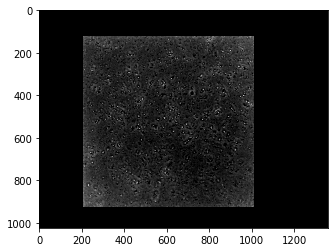

In [5]:
plt.imshow(frames[0])

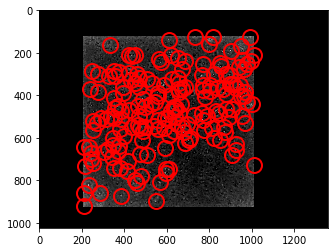

In [6]:
f = tp.locate(frames[0], 13, invert=False, minmass=100, maxsize=3, threshold=35)

plt.figure()
tp.annotate(f, frames[0])

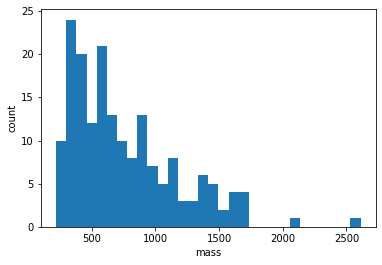

In [7]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=30)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000004697FA4408>,
      dtype=object)

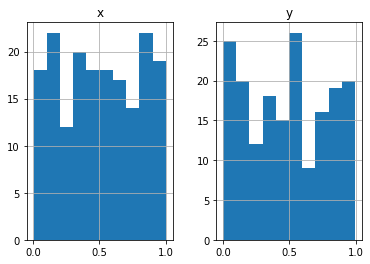

In [8]:
tp.subpx_bias(f)

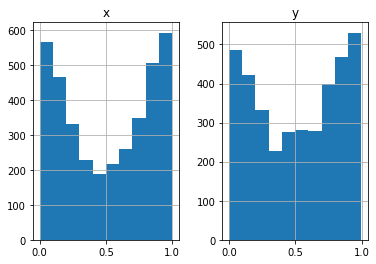

In [9]:
tp.subpx_bias(tp.locate(frames[0], 7, invert=False, minmass=20));

In [10]:
f = tp.batch(frames[:123], 13, minmass=5, invert=False);

Frame 122: 1200 features


In [11]:
# tp.quiet()  # Turn off progress reports for best performance
t = tp.link(f, 5, memory=3)

Frame 122: 1200 trajectories present.


In [12]:
t1 = tp.filter_stubs(t, 25)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 25722
After: 962


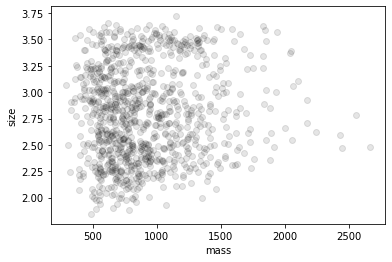

In [13]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

In [14]:
t2 = t1[((t1['mass'] > 50) & (t1['size'] < 2.6) &
         (t1['ecc'] < 0.3))]

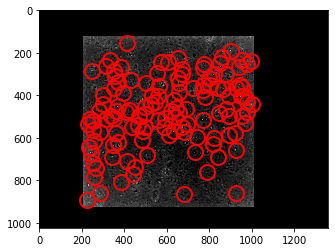

In [15]:
plt.figure()
tp.annotate(t2[t2['frame'] == 0], frames[0]);

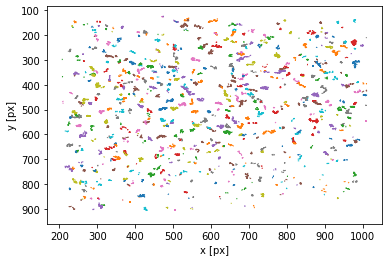

In [16]:
plt.figure()
tp.plot_traj(t2);

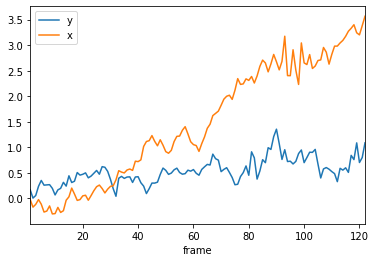

In [17]:
d = tp.compute_drift(t2)
d.plot()
plt.show()

In [18]:
tm = tp.subtract_drift(t2.copy(), d)

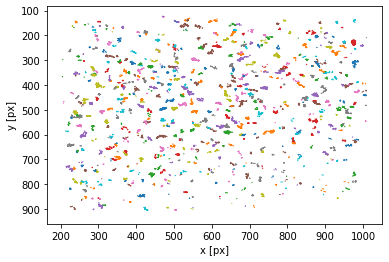

In [19]:
ax = tp.plot_traj(tm)
plt.show()

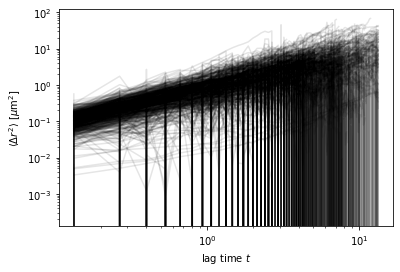

In [23]:
im = tp.imsd(tm, 1/4.33338, 7.5)  # microns per pixel = 100/285., frames per second = 24

fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')

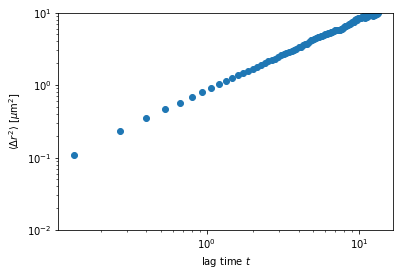

In [24]:
em = tp.emsd(tm, 1/4.33338, 7.5) # microns per pixel = 100/285., frames per second = 24

fig, ax = plt.subplots()
ax.plot(em.index, em, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set(ylim=(1e-2, 10));

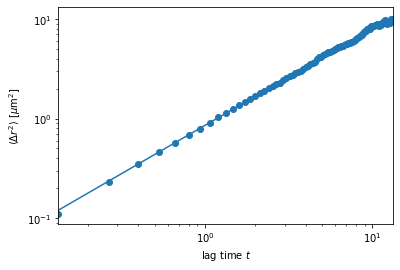

,n,A
msd,0.973311,0.853038


In [25]:
plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$');
tp.utils.fit_powerlaw(em)  # performs linear best fit in log space, plots]